In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset
df = pd.read_csv("Churn_Modelling.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# 1. Summary statistics of numerical columns
print("Summary of Numerical Columns:")
df.describe()

In [ ]:
# 2. Distribution of categorical columns
print("\nDistribution of Categorical Columns:")
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
print(df[categorical_columns].value_counts())

In [ ]:
# 3. Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

In [ ]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# 4. Correlation analysis between numerical features and target variable 'Exited'
print("\nCorrelation with 'Exited':")
correlation_matrix = numerical_df.corr()

# Display the correlation with 'Exited'
print(correlation_matrix['Exited'])

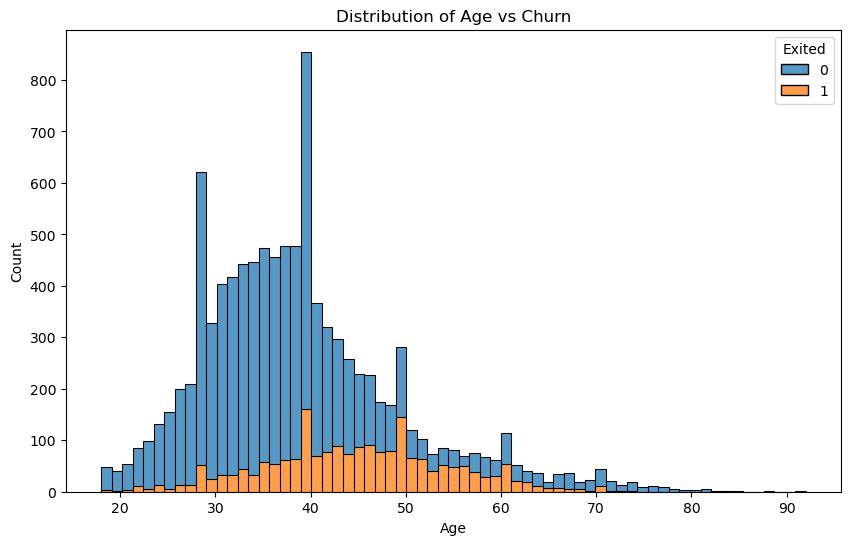

In [27]:
# Optional: Visualization to enhance understanding
# Plotting the distribution of numerical variables with respect to churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', multiple='stack', kde=False)
plt.title('Distribution of Age vs Churn')
plt.show()

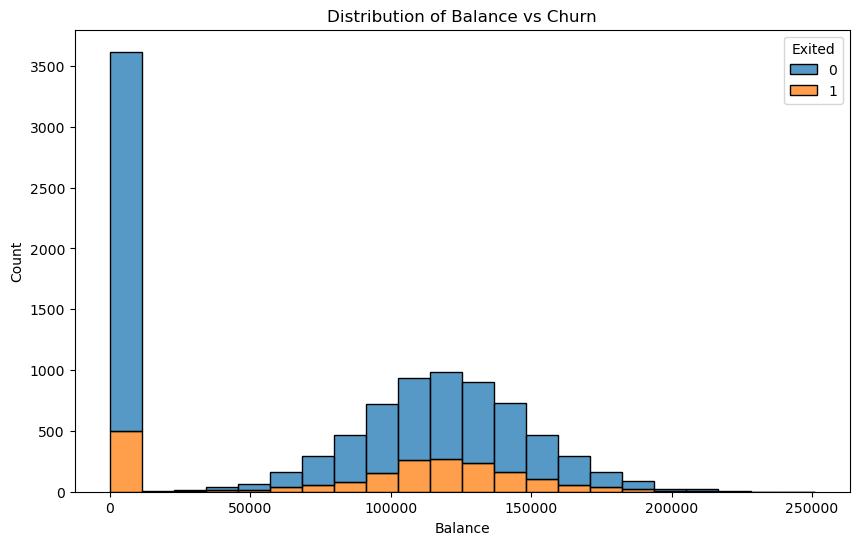

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', hue='Exited', multiple='stack', kde=False)
plt.title('Distribution of Balance vs Churn')
plt.show()

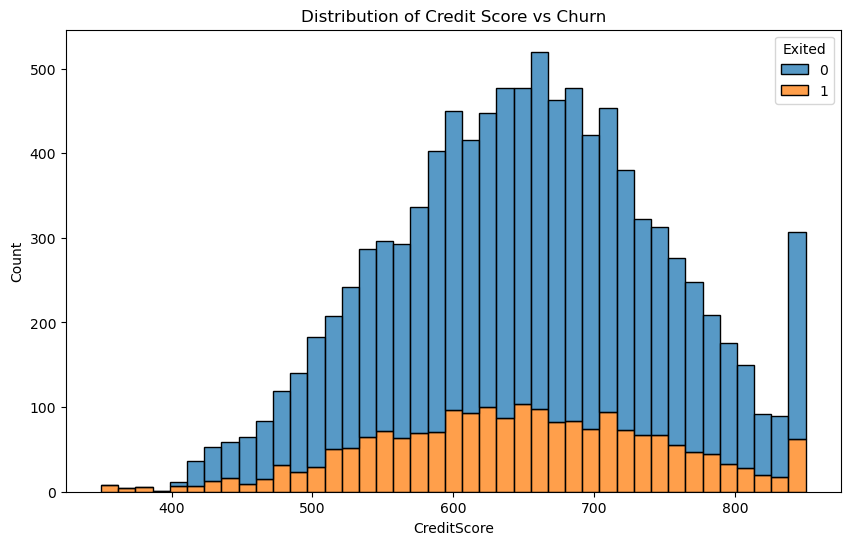

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', multiple='stack', kde=False)
plt.title('Distribution of Credit Score vs Churn')
plt.show()

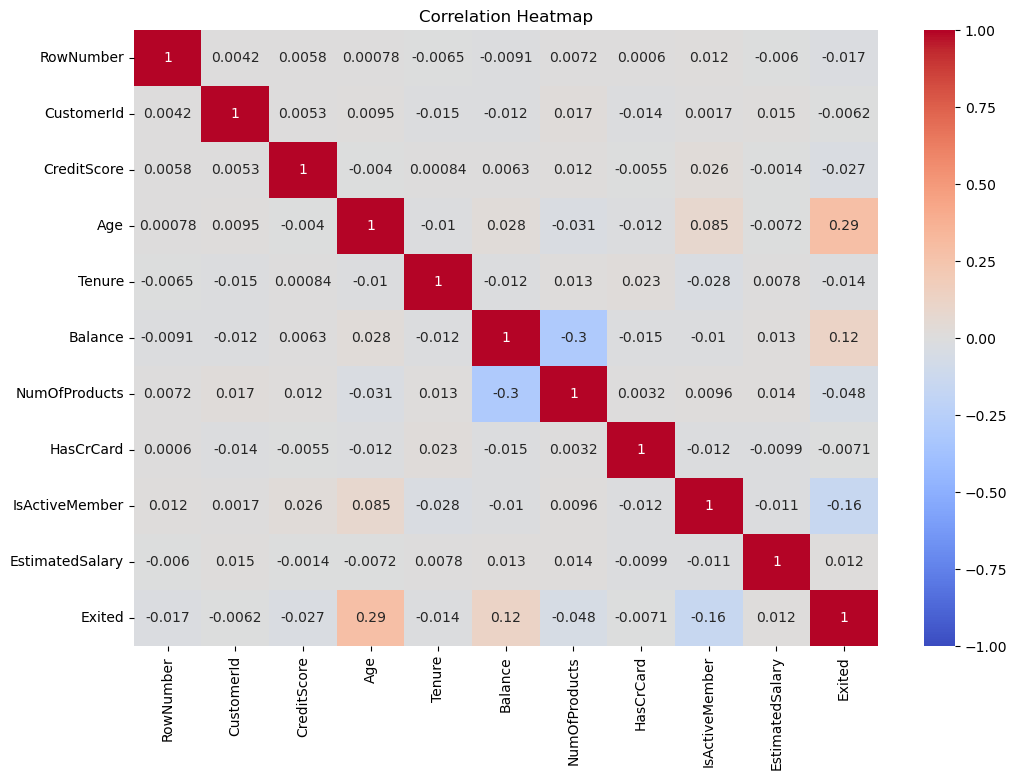

In [33]:
# Plotting a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

In [37]:
# Step 1: Encode categorical variables
# One-hot encode 'Geography' and label encode 'Gender'
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [39]:
# Label encode 'Gender'
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [41]:
# Step 2: Scale numerical features
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure']

In [43]:
# Apply scaling to numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [45]:
# Step 3: Split the data into training and testing sets
# Define the features (X) and the target (y)
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited'])  # Remove unnecessary columns
y = df['Exited']  # Target variable

In [47]:
# Split the dataset: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Display the shape of the datasets to confirm the split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (8000, 11)
Testing set shape: (2000, 11)


In [53]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 186.2 kB/s eta 0:11:11
   ---------------------------------------- 0.0/124.9 MB 186.2 kB/s eta 0:11:11
   ---------------------------------------- 0.0/124.9 MB 151.3 kB/s eta 0:13:46
   ---------------------------------------- 0.1/124.9 MB 269.5 kB/s eta 0:07:44
   ---------------------------------------- 0.1/124.9 MB 312.2 kB/s eta 0:06:40
   ---------------------------------------- 0.1/124.9 MB 355.0 kB/s eta 0:05:52
   ---------------------------------------- 0.2/124.9 MB 339.7 kB/s eta 0:06:08
   ---------------------------------------- 0.2/124.9 MB 480.3 kB/s eta 0:04:20
   ---------------------------------------- 0.2/124.9 MB 480.3 kB/s eta 0:04:20
   ---------------------------------------- 0.4/124.9 MB 620.1 kB/s

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost Classifier without 'use_label_encoder'
xgb_model = XGBClassifier(eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 86.40%
Confusion Matrix:
 [[1526   81]
 [ 191  202]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



In [63]:
# Step 1: Customer Age Group (Binning Age)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 50, 92], labels=['Young', 'Middle-aged', 'Senior'])

# Step 2: Balance to Salary Ratio
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
df['BalanceSalaryRatio'] = df['BalanceSalaryRatio'].fillna(0)  # Handle potential division by zero

# Step 3: Tenure Group (Binning Tenure)
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 3, 7, 10], labels=['Short-term', 'Medium-term', 'Long-term'])

# Step 4: Interaction between NumOfProducts and IsActiveMember
df['ProductActiveInteraction'] = df['NumOfProducts'] * df['IsActiveMember']

# Step 5: Credit Score Bucket (Binning Credit Score)
df['CreditScoreBucket'] = pd.cut(df['CreditScore'], bins=[300, 600, 750, 850], labels=['Low', 'Medium', 'High'])

# Step 6: Engagement Score (Custom feature combining activity indicators)
df['EngagementScore'] = df['NumOfProducts'] + df['IsActiveMember'] + df['HasCrCard']

# Convert new categorical features into dummy variables
df = pd.get_dummies(df, columns=['AgeGroup', 'TenureGroup', 'CreditScoreBucket'], drop_first=True)

# Display the newly created and transformed features
new_features = ['BalanceSalaryRatio', 'ProductActiveInteraction', 'EngagementScore'] + \
               [col for col in df.columns if 'AgeGroup' in col or 'TenureGroup' in col or 'CreditScoreBucket' in col]

df[new_features].head()


,BalanceSalaryRatio,ProductActiveInteraction,EngagementScore,AgeGroup_Middle-aged,AgeGroup_Middle-aged,AgeGroup_Middle-aged,AgeGroup_Senior,AgeGroup_Senior,AgeGroup_Senior,TenureGroup_Medium-term,...,TenureGroup_Medium-term,TenureGroup_Long-term,TenureGroup_Long-term,TenureGroup_Long-term,CreditScoreBucket_Medium,CreditScoreBucket_Medium,CreditScoreBucket_Medium,CreditScoreBucket_High,CreditScoreBucket_High,CreditScoreBucket_High
0,-56.009321,1,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.541948,1,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5.538537,0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,11.254784,0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-2.151054,1,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RowNumber                 10000 non-null  int64  
 1   CustomerId                10000 non-null  int64  
 2   Surname                   10000 non-null  object 
 3   CreditScore               10000 non-null  float64
 4   Gender                    10000 non-null  int32  
 5   Age                       10000 non-null  float64
 6   Tenure                    10000 non-null  float64
 7   Balance                   10000 non-null  float64
 8   NumOfProducts             10000 non-null  int64  
 9   HasCrCard                 10000 non-null  int64  
 10  IsActiveMember            10000 non-null  int64  
 11  EstimatedSalary           10000 non-null  float64
 12  Exited                    10000 non-null  int64  
 13  Geography_Germany         10000 non-null  bool   
 14  Geograp

In [77]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Step 1: Prepare the features and target variable
# Drop unnecessary and duplicated columns
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited', 
                     'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'TenureGroup_Medium-term', 
                     'TenureGroup_Long-term', 'CreditScoreBucket_Medium', 'CreditScoreBucket_High'])

# Convert all boolean columns to integers (XGBoost requires numerical data)
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

# The target variable
y = df['Exited']

# Step 2: Check data types to ensure all columns are numeric
print(X.dtypes)

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale the numerical features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 
                  'BalanceSalaryRatio', 'ProductActiveInteraction', 'EngagementScore']

scaler = StandardScaler()

# Scale the numerical columns separately
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Step 5: Retrain the XGBoost model with the new features
xgb_model = XGBClassifier(eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


CreditScore                 float64
Gender                        int32
Age                         float64
Tenure                      float64
Balance                     float64
NumOfProducts                 int64
HasCrCard                     int64
IsActiveMember                int64
EstimatedSalary             float64
Geography_Germany             int32
Geography_Spain               int32
BalanceSalaryRatio          float64
ProductActiveInteraction      int64
EngagementScore               int64
dtype: object
Accuracy: 86.20%
Confusion Matrix:
 [[1517   90]
 [ 186  207]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92      1607
           1       0.70      0.53      0.60       393

    accuracy                           0.86      2000
   macro avg       0.79      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [79]:
# Adding class weight to penalize the model for misclassifying the minority class
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Train the model
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 84.50%
Confusion Matrix:
 [[1428  179]
 [ 131  262]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.59      0.67      0.63       393

    accuracy                           0.84      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.84      0.85      2000



In [81]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))

# Set up RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train_scaled, y_train)

# Best parameters from the search
print("Best Parameters:", random_search.best_params_)

# Predict using the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Accuracy: 84.80%
Confusion Matrix:
 [[1455  152]
 [ 152  241]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      1607
           1       0.61      0.61      0.61       393

    accuracy                           0.85      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



In [83]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier

# Step 1: Prepare the features and target variable
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited', 
                     'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'TenureGroup_Medium-term', 
                     'TenureGroup_Long-term', 'CreditScoreBucket_Medium', 'CreditScoreBucket_High'])
y = df['Exited']

# Convert all boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Scale the numerical features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 
                  'BalanceSalaryRatio', 'ProductActiveInteraction', 'EngagementScore']

scaler = StandardScaler()

# Scale the numerical columns separately
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Step 5: Retrain the XGBoost model with the new features
xgb_model = XGBClassifier(eval_metric='logloss', 
                          subsample=0.8, 
                          n_estimators=200, 
                          max_depth=7, 
                          learning_rate=0.2, 
                          colsample_bytree=1.0)

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Step 6: Make predictions on the test data
y_pred = xgb_model.predict(X_test_scaled)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Display Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy: 90.36%
Confusion Matrix:
 [[1484  149]
 [ 158 1395]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91      1633
           1       0.90      0.90      0.90      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



In [85]:
# Training set accuracy
train_pred = xgb_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Test set accuracy (already calculated earlier)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 99.73%
Test Accuracy: 90.36%


In [91]:
# Training set accuracy
train_pred = xgb_model.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Test set accuracy (already calculated earlier)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 99.79%
Test Accuracy: 90.68%


In [99]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Prepare the features and target variable
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited', 
                     'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'TenureGroup_Medium-term', 
                     'TenureGroup_Long-term', 'CreditScoreBucket_Medium', 'CreditScoreBucket_High'])
y = df['Exited']

In [101]:
# Convert all boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

In [103]:
# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [105]:
# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [107]:
# Step 4: Scale the numerical features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 
                  'BalanceSalaryRatio', 'ProductActiveInteraction', 'EngagementScore']

In [109]:
scaler = StandardScaler()

# Scale the numerical columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [111]:
# Step 5: Initialize XGBoost model with reduced complexity and regularization
xgb_model = XGBClassifier(
    eval_metric='logloss', 
    subsample=0.8, 
    n_estimators=200, 
    max_depth=5,           # Reduced depth to prevent overfitting
    learning_rate=0.2, 
    colsample_bytree=1.0,
    reg_alpha=0.1,         # L1 regularization to prevent overfitting
    reg_lambda=0.5         # L2 regularization to prevent overfitting
)


In [115]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Prepare the features and target variable
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited', 
                     'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'TenureGroup_Medium-term', 
                     'TenureGroup_Long-term', 'CreditScoreBucket_Medium', 'CreditScoreBucket_High'])
y = df['Exited']

# Convert all boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Scale the numerical features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 
                  'BalanceSalaryRatio', 'ProductActiveInteraction', 'EngagementScore']

scaler = StandardScaler()

# Scale the numerical columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Step 5: Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Step 6: Define XGBoost parameters with regularization
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'subsample': 0.8,
    'learning_rate': 0.2,
    'max_depth': 5,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.1,    # L1 regularization
    'reg_lambda': 0.5    # L2 regularization
}

# Step 7: Train the model with early stopping
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=200, early_stopping_rounds=10, evals=evals, verbose_eval=True)

# Step 8: Make predictions on the test data
y_pred = (xgb_model.predict(dtest) > 0.5).astype(int)

# Step 9: Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 10: Cross-validation to check for overfitting (optional)
cv_scores = cross_val_score(XGBClassifier(**params), X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")


[0]	train-logloss:0.62141	eval-logloss:0.62220
[1]	train-logloss:0.57128	eval-logloss:0.57282
[2]	train-logloss:0.53526	eval-logloss:0.53868
[3]	train-logloss:0.50532	eval-logloss:0.50886
[4]	train-logloss:0.48431	eval-logloss:0.49015
[5]	train-logloss:0.46700	eval-logloss:0.47412
[6]	train-logloss:0.45358	eval-logloss:0.46206
[7]	train-logloss:0.44124	eval-logloss:0.45038
[8]	train-logloss:0.43110	eval-logloss:0.44133
[9]	train-logloss:0.42169	eval-logloss:0.43087
[10]	train-logloss:0.41411	eval-logloss:0.42343
[11]	train-logloss:0.40630	eval-logloss:0.41717
[12]	train-logloss:0.40069	eval-logloss:0.41242
[13]	train-logloss:0.39269	eval-logloss:0.40548
[14]	train-logloss:0.38797	eval-logloss:0.40094
[15]	train-logloss:0.38110	eval-logloss:0.39466
[16]	train-logloss:0.37663	eval-logloss:0.39031
[17]	train-logloss:0.37281	eval-logloss:0.38631
[18]	train-logloss:0.36606	eval-logloss:0.37991
[19]	train-logloss:0.36393	eval-logloss:0.37797
[20]	train-logloss:0.35520	eval-logloss:0.36949
[2

In [117]:
# This script trains an XGBoost model with a lower learning rate and more boosting rounds to improve performance and generalization, using early stopping and cross-validation to monitor and prevent overfitting.

import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Prepare the features and target variable
X = df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited', 
                     'AgeGroup_Middle-aged', 'AgeGroup_Senior', 'TenureGroup_Medium-term', 
                     'TenureGroup_Long-term', 'CreditScoreBucket_Medium', 'CreditScoreBucket_High'])
y = df['Exited']

# Convert all boolean columns to integers
X = X.astype({col: 'int' for col in X.select_dtypes('bool').columns})

# Step 2: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Scale the numerical features
numerical_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 
                  'BalanceSalaryRatio', 'ProductActiveInteraction', 'EngagementScore']

scaler = StandardScaler()

# Scale the numerical columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Step 5: Prepare DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Step 6: Define XGBoost parameters with a lower learning rate
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'subsample': 0.8,
    'learning_rate': 0.1,  # Lowered learning rate
    'max_depth': 5,
    'colsample_bytree': 1.0,
    'reg_alpha': 0.1,    # L1 regularization
    'reg_lambda': 0.5    # L2 regularization
}

# Step 7: Train the model with early stopping and more boosting rounds
evals = [(dtrain, 'train'), (dtest, 'eval')]
xgb_model = xgb.train(params, dtrain, num_boost_round=500, early_stopping_rounds=10, evals=evals, verbose_eval=True)

# Step 8: Make predictions on the test data
y_pred = (xgb_model.predict(dtest) > 0.5).astype(int)

# Step 9: Evaluate the model's performance
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Display Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Step 10: Cross-validation to check for overfitting (optional)
cv_scores = cross_val_score(XGBClassifier(**params), X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")


[0]	train-logloss:0.65529	eval-logloss:0.65577
[1]	train-logloss:0.62368	eval-logloss:0.62475
[2]	train-logloss:0.59701	eval-logloss:0.59841
[3]	train-logloss:0.57448	eval-logloss:0.57551
[4]	train-logloss:0.55514	eval-logloss:0.55668
[5]	train-logloss:0.53800	eval-logloss:0.53968
[6]	train-logloss:0.52348	eval-logloss:0.52577
[7]	train-logloss:0.50918	eval-logloss:0.51222
[8]	train-logloss:0.49719	eval-logloss:0.50064
[9]	train-logloss:0.48712	eval-logloss:0.49108
[10]	train-logloss:0.47801	eval-logloss:0.48264
[11]	train-logloss:0.46870	eval-logloss:0.47409
[12]	train-logloss:0.46038	eval-logloss:0.46639
[13]	train-logloss:0.45316	eval-logloss:0.45967
[14]	train-logloss:0.44723	eval-logloss:0.45438
[15]	train-logloss:0.44149	eval-logloss:0.44802
[16]	train-logloss:0.43620	eval-logloss:0.44317
[17]	train-logloss:0.43169	eval-logloss:0.43928
[18]	train-logloss:0.42764	eval-logloss:0.43576
[19]	train-logloss:0.42338	eval-logloss:0.43208
[20]	train-logloss:0.41969	eval-logloss:0.42842
[2